In [1]:
%pip install h5py # h5py vous permet d'ouvrir les fichiers au format hdf5. N'oubliez pas de l'installer !
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from utilities import *

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


### Fonctions

In [43]:
def init(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

def model(X, W, b):
    Z = X.dot(W) + b 
    A = 1 / (1+np.exp(-Z))
    return A

def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW 
    b = b - learning_rate * db 
    return (W, b)

def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5


In [61]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    # init
    W, b = init(X)
    loss = []

    for _ in tqdm(range(n_iter)):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(loss)
    plt.show()

    return (W, b)


### Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


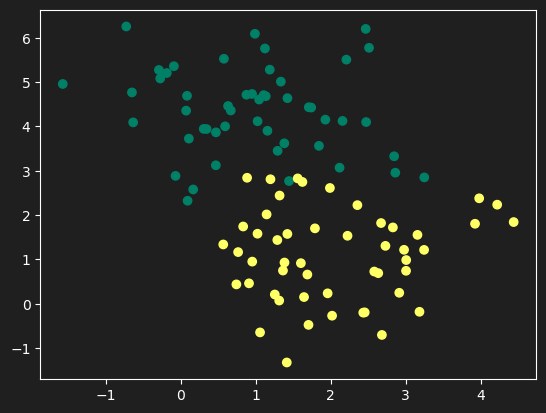

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

### Exercices Cat & Dog

In [49]:
X_train, y_train, X_test, y_test = load_data()

In [6]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [7]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\BRAVO\AppData\Local\Temp\ipykernel_12488\233491810.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


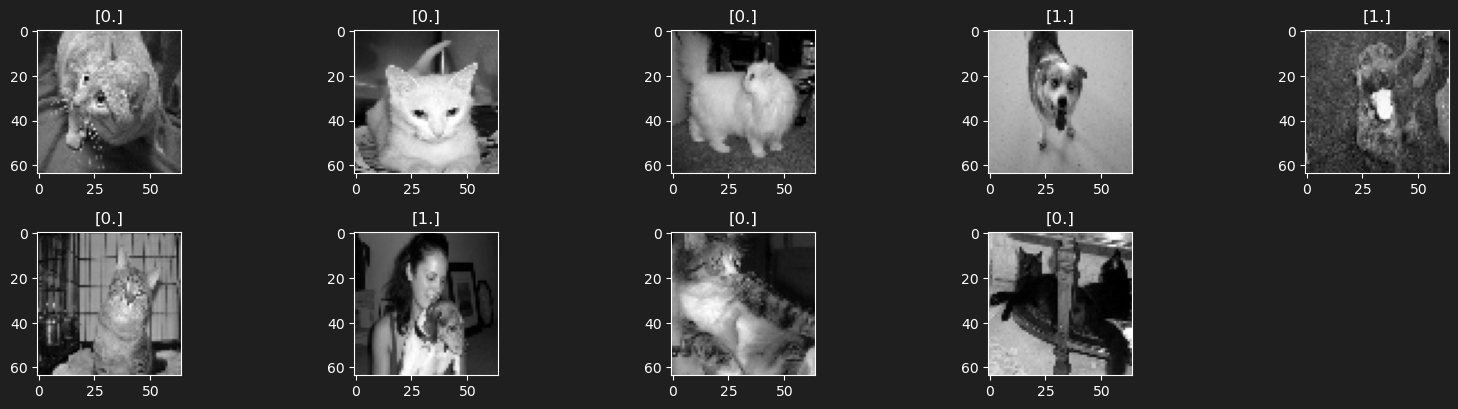

In [8]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [ ]:
# TO DO 
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !

#### Solutions

In [50]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) # le -1 c le reste donc la c le reste donc 64 x 64
print(X_train_reshape.shape)
X_test_reshape = X_test.reshape(X_test.shape[0], -1) # le -1 c le reste donc la c le reste donc 64 x 64
X_test_reshape.shape

(1000, 4096)


(200, 4096)

on ajoute un epsilon dans le log loss pour counte rle prob de
calcl un log de 0 =>

le prob de overflof de l'exp => reosudre en normalisant => empeche valeur trop grande ou trop petite

## Expérience sur la Normalisation

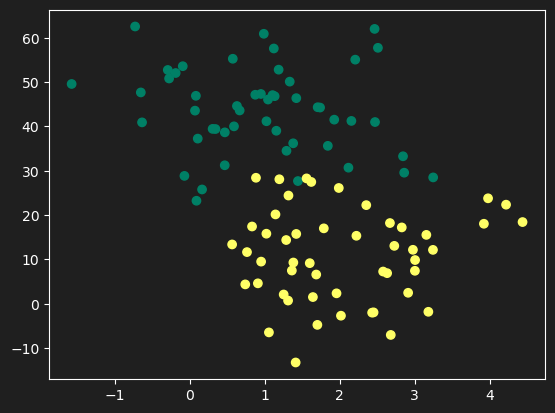

In [30]:
from sklearn.datasets import make_blobs 

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

# on va modifier X pr montrer  que la fonciton cout se compresse (enlever la ligne pr voir meme ordre de grandeur)
X[:, 1] = X[:, 1] * 10

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

In [31]:
lim = 10
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape

(2, 10000)

In [32]:
b = 0
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))

epsilon = 1e-15
L =  1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)

L.shape

(100, 100)

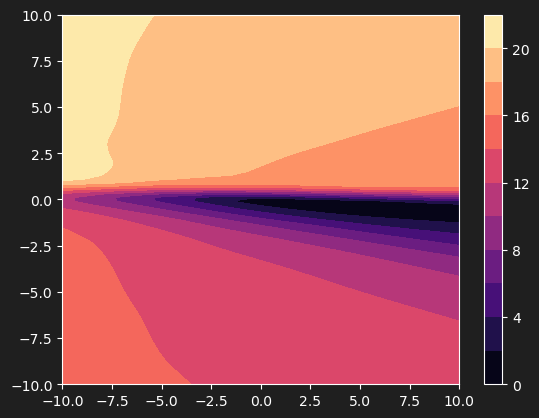

In [33]:
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()
plt.show()

### MTN sur le chat et CHien

normalisation minmax : X = (X - X_min) / (X_max - X_min)

In [51]:
X_train_reshape = X_train_reshape / X_train.max()
X_test_reshape = X_test_reshape / X_train.max()

In [52]:
print(X_train.max())
X_train_reshape.max()

254


1.0

0.51


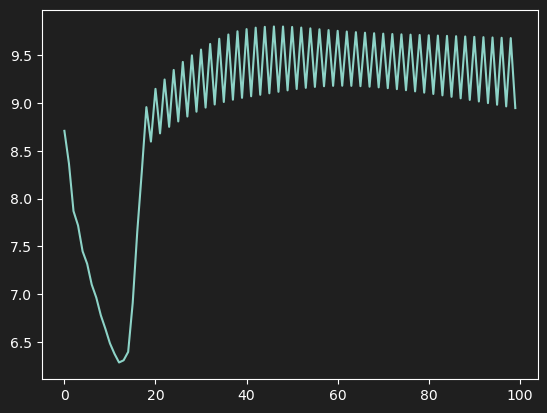

In [54]:
W, b = artificial_neuron(X_train_reshape, y_train, learning_rate=0.1)

100%|██████████| 10000/10000 [00:52<00:00, 188.95it/s]


0.716


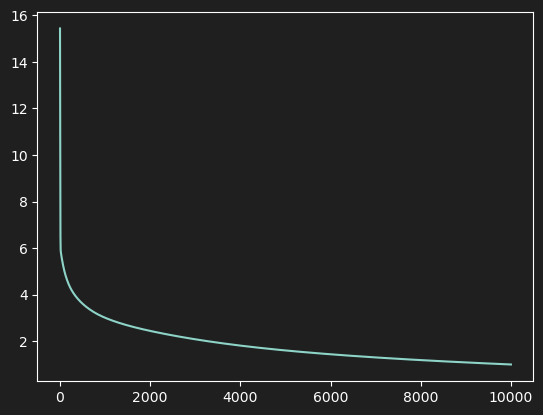

In [64]:
W, b = artificial_neuron(X_train_reshape, y_train, learning_rate=0.01, n_iter=10_000)

In [65]:
def artificial_neuronmultiple_graph(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = init(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

100%|██████████| 10000/10000 [01:01<00:00, 163.57it/s]


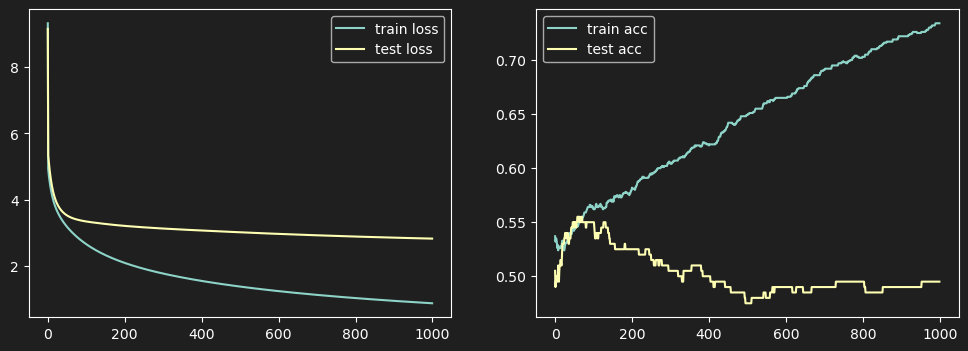

In [69]:
W, b = artificial_neuronmultiple_graph(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10_000)

On voit que les courbe se croise
train augmente en acc et diminue en loss alors que test loss n'apprend plus et accuracy de test n'augmente pas donc => Overfitting

Pour regler => donner plus de photos
ca rici on a plus de features que de photos => fleau de la dimension, l'espace des données est principalement remple de vide.